<font color="darkblue"> Prática 02: Árvore de Decisão - parâmetros </font>

**Objetivos:**

*   Efetuar um experimento de classificação com dados reais usando a classe $DecisionTreeClassifier$ do pacote $sklearn.tree$;
*   Plotar a árvore de decisão inferida em arquivo e na tela;
*   Analisar os principais parâmetros da classe $DecisionTreeClassifier$.


**Requisitos de execução:**


*   Upload do arquivo *diabetes.csv*

**Atividade 1:**

1. Visitar a base de dados: https://www.kaggle.com/uciml/pima-indians-diabetes-database
2. Carregar os dados do arquivo *diabetes.csv* utilizando o pandas.



In [1]:
import pandas as pd

diabete = pd.read_csv("diabetes.csv", sep=',')

# Pega o cabecalho do arquivo
print(diabete.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**Atividade 2:**

1. Extrair os valores do *DataFrame* pandas e dividir em dados de treino e de teste


In [2]:
from sklearn.model_selection import train_test_split

Features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabete[Features].values
y = diabete.Outcome.values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2698)

print("Tamanho treino: " + str(len(x_train)))
print("Tamanho teste: " + str(len(x_test)))


Tamanho treino: 614
Tamanho teste: 154


**Atividade 3:**

1. Utilize a classe *DecisionTreeClassifier*, importada do pacote *sklearn.tree*, para inferir aprendizado dos dados de treinamento;
2. Compute as métricas de aprendizado sobre os dados de teste.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)



print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(x_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(x_test))))
print(classification_report(y_test, clf.predict(x_test)))

Ein: 0.0000
Eout: 0.3117
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        98
           1       0.58      0.54      0.56        56

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.68      0.69      0.69       154



**Atividade 4:**

1. Liste os atributos dos dados com o seu valor de importância usado na divisão dos nós da árvore de decisão.

Pregnancies:0.07635551441215337
Glucose:0.323749268196869
BloodPressure:0.0846181223535392
SkinThickness:0.0463993175792148
Insulin:0.07099204081928377
BMI:0.18207217651726862
DiabetesPedigreeFunction:0.0813931124224358
Age:0.13442044769923542


<BarContainer object of 8 artists>

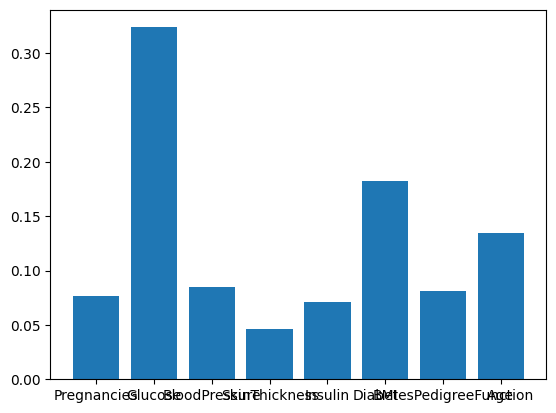

In [4]:
from matplotlib import pyplot as plt

for feature, importance in zip(Features, clf.feature_importances_):
    print("{}:{}".format(feature, importance))

plt.bar(Features, clf.feature_importances_)

**Atividade 5:**

1. Plote a árvore de decisão criada pelo classificador usando a função *plot_tree*;
2. Salve a figura em arquivo.

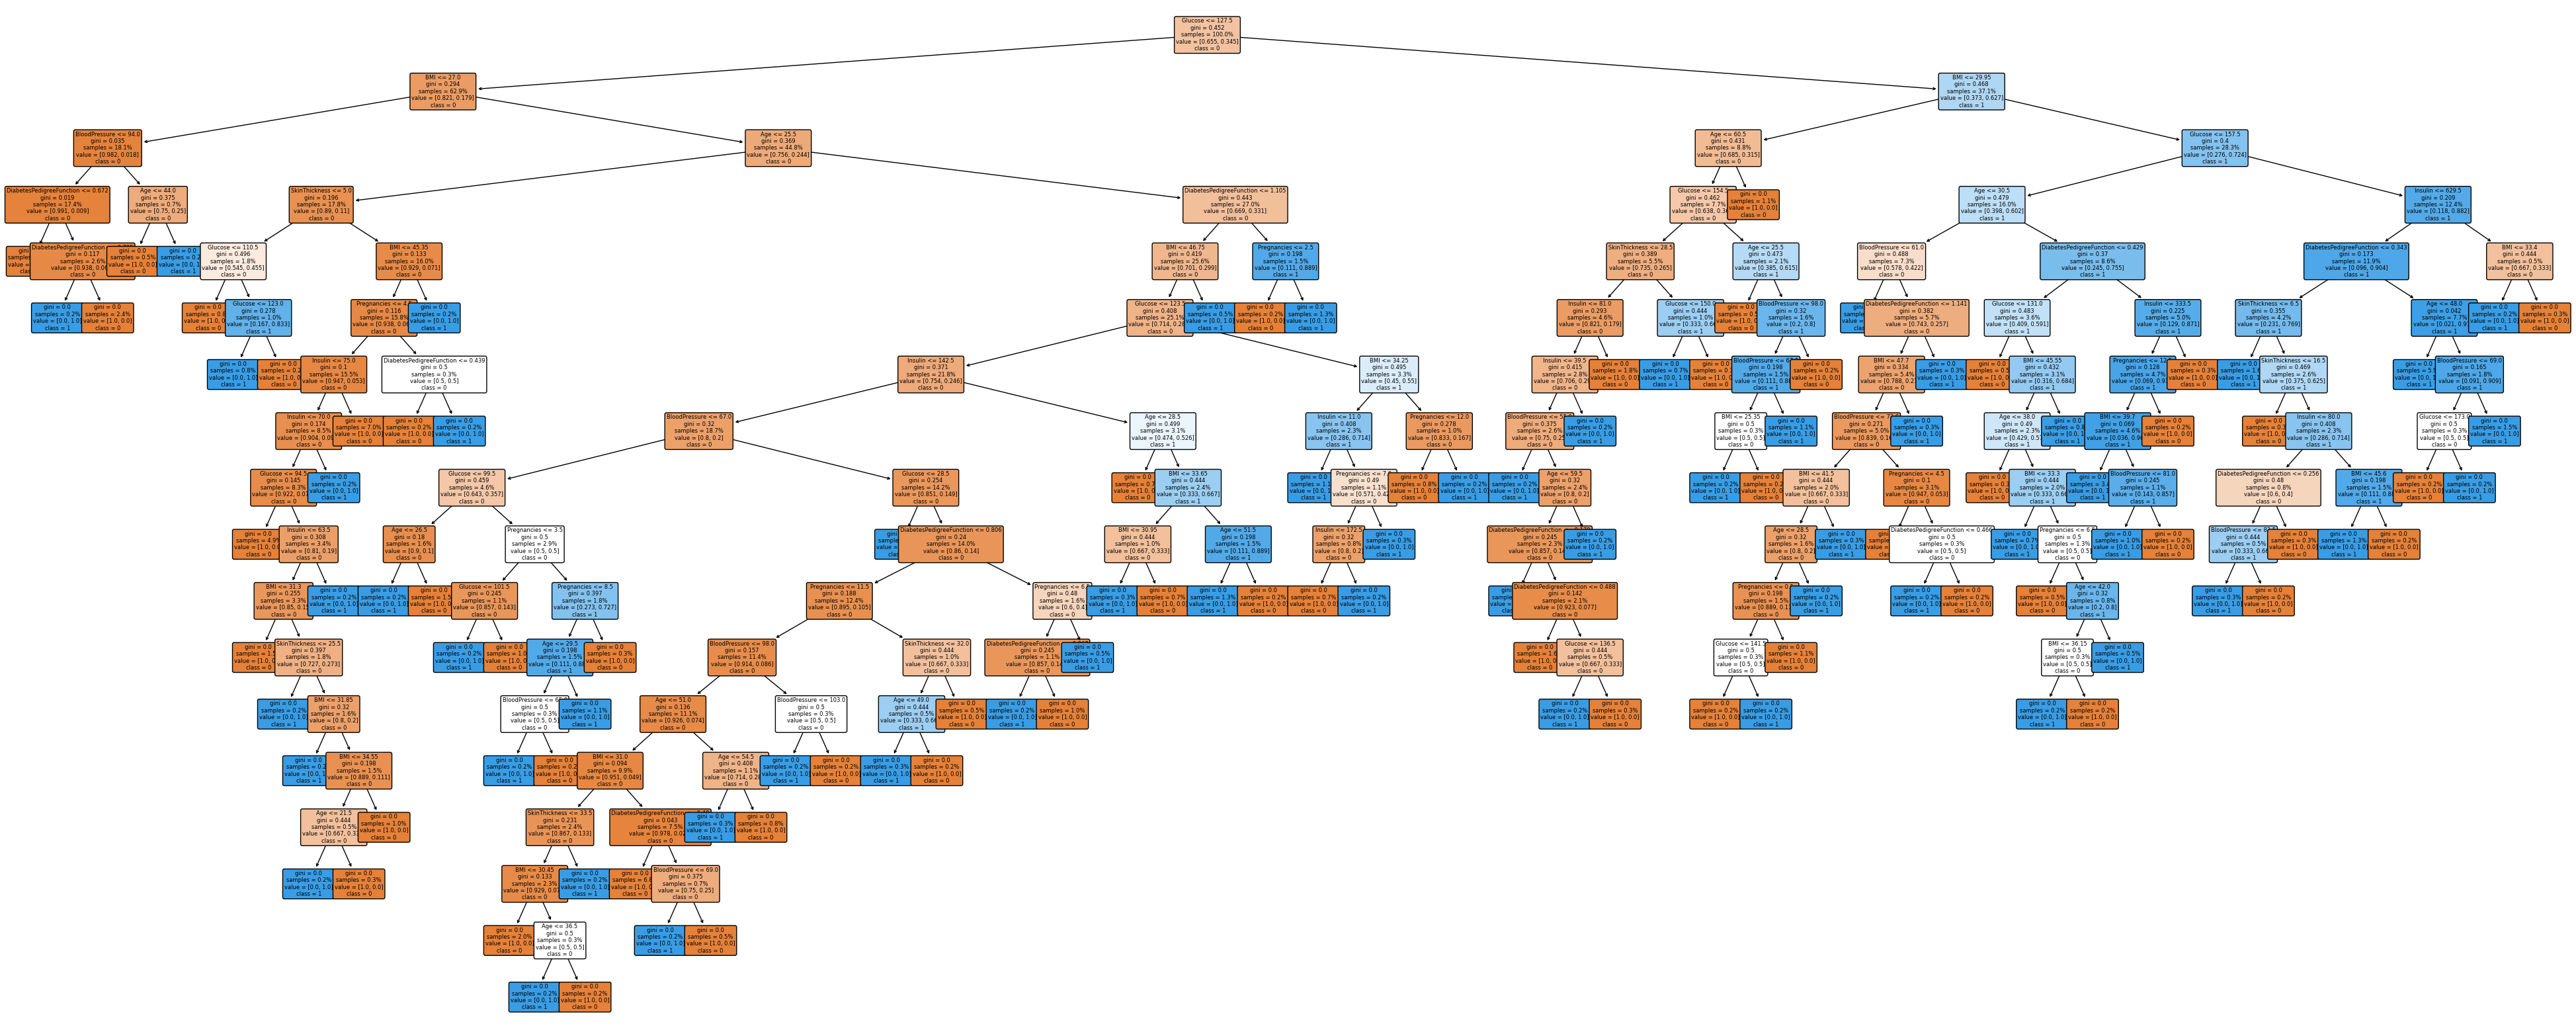

In [5]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

# feature labels
features_label = (diabete.drop('Outcome',axis=1)).columns

# class label
class_label = ['0','1']

plt.figure(figsize=(50,20))
plot_tree(
    clf,
    feature_names = features_label,
    class_names = class_label,
    filled=True,
    proportion = True,
    fontsize=6,
    rounded = True)

plt.savefig('filename.png')

**Atividade 6:**

1. Plote a árvore de decisão criada pelo classificador usando a função *export_graphviz*.

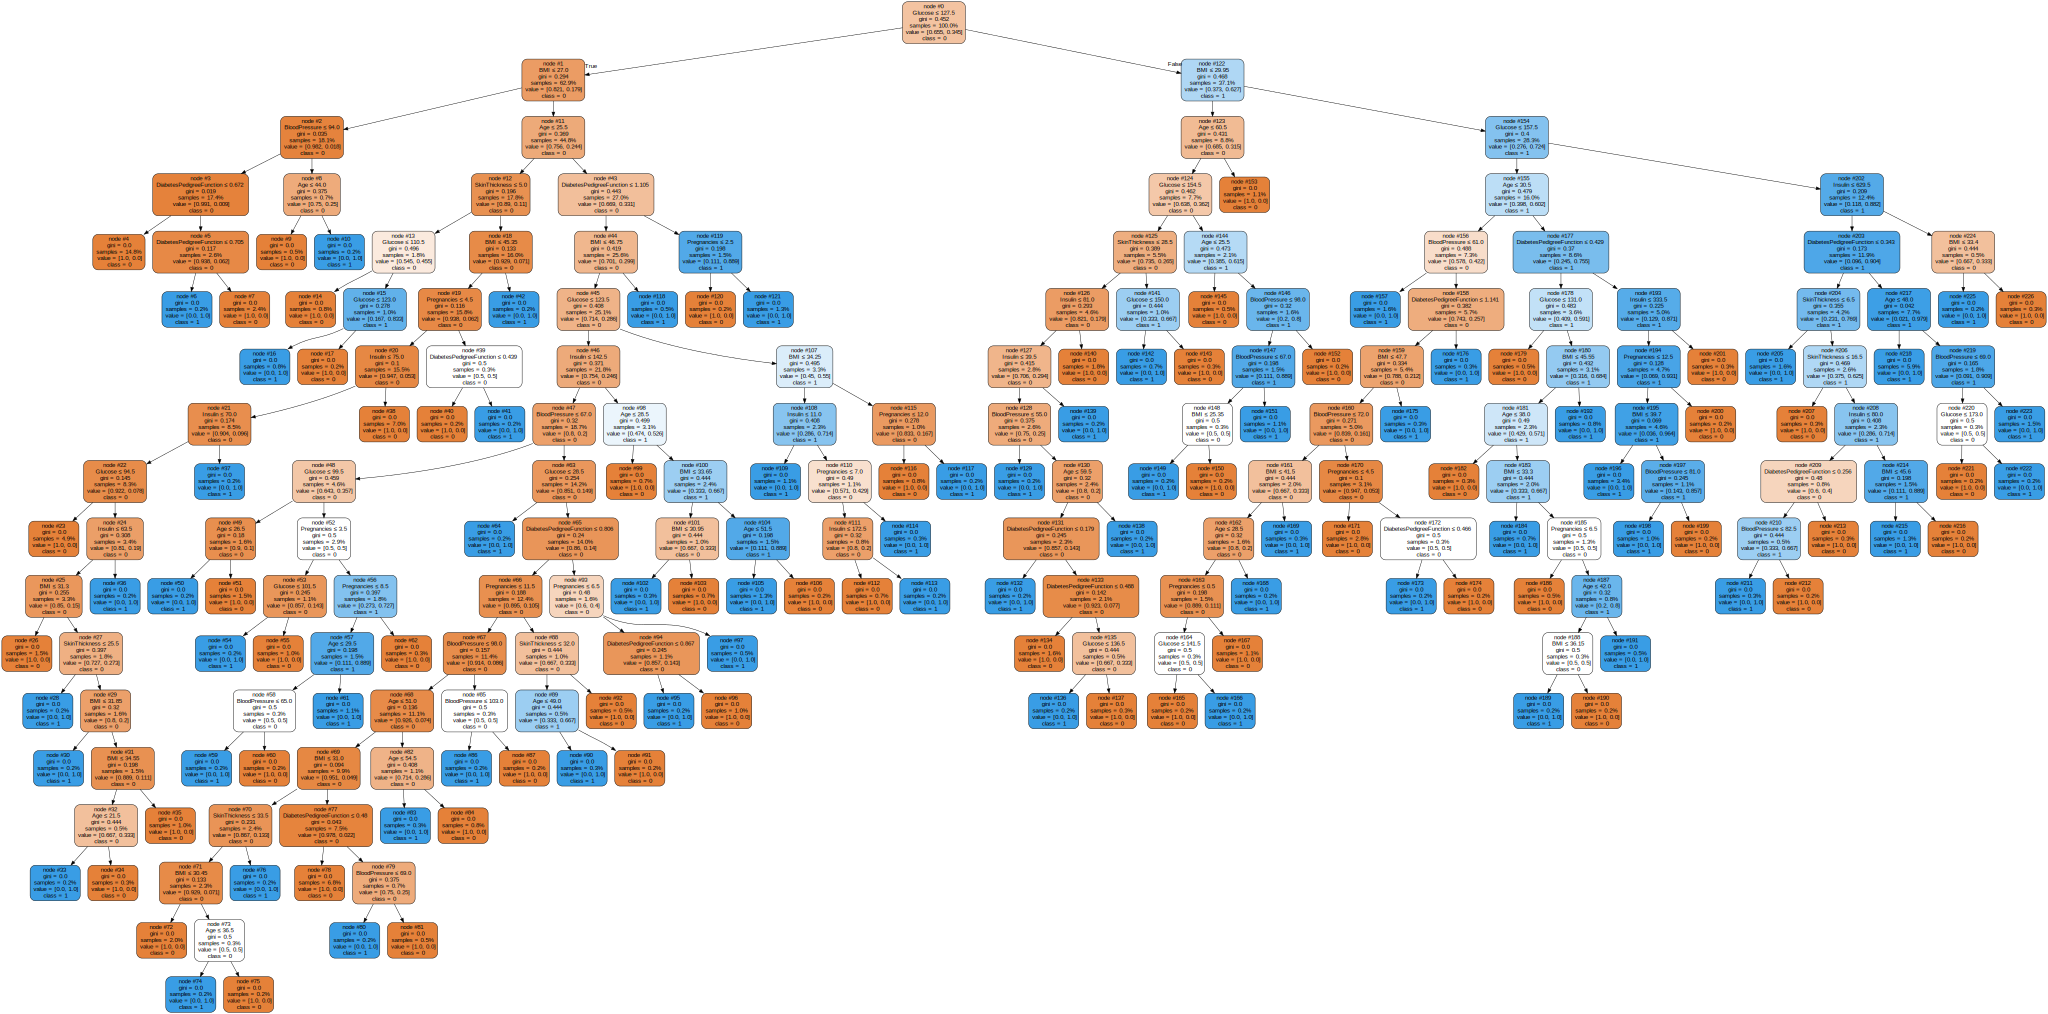

In [6]:
import pydot
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
         clf,
         out_file = None,
         feature_names = features_label,
         class_names = class_label,
         filled = True,
         rounded = True,
         proportion = True,
         node_ids = True,
         rotate  =False,
         label = 'all',
         special_characters = True
        )
graph = graphviz.Source(dot_data)
graph

**Atividade 7:**

1. Criar uma interface iterativa para configurar os parâmetros da *DecisionTreeClassifier*
2. Analisar o resultado produzido pelos parâmtros em termos de $E_{in}$ e $E_{out}$



> Parâmetros:

*   *criterion* : medida de qualidade da divisão dos nós. $[entropy, gain]$;
*   *splitter* : estratégia de divisão dos nós. $[best, random]$;
*   *max_depth* : máxima profundidade da árvore;
*   *min_samples_split* : número mínimo de amostras requeridas para dividir um nó;
*   *min_samples_leaf* : quantidade mínima de amostras para ser um nó folha. Um nó só divide se seus filhos tiverem esta quantidade garantida.










In [7]:
from ipywidgets import interactive
from IPython.display import SVG,display
from graphviz import Source

def plot_tree(crit, split, depth, min_samples_split, min_samples_leaf=0.2):
    estimator = DecisionTreeClassifier(
           random_state = 0
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=min_samples_split
          ,min_samples_leaf=min_samples_leaf
    )
    estimator.fit(x_train, y_train)

    print('Ein: %0.4f' % (1 - accuracy_score(y_train, estimator.predict(x_train))))
    print('Eout: %0.4f' % (1 - accuracy_score(y_test, estimator.predict(x_test))))

    print(classification_report(y_test, estimator.predict(x_test)))
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True))

    display(SVG(graph.pipe(format='svg')))
    return estimator

inter=interactive(plot_tree
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4,5,10,20,30]
   , min_samples_split=(1,8)
   , min_samples_leaf=(1,20))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

**Atividade 8:**

1. Implementar um código que exiba a sequência de regras seguidas pela árvore de decisão durante a classificação de um novo dado de entrada.

In [8]:

def extract_rules(sample_id, clf):
    x_sample = x_test[sample_id]

    #Id das features analisadas em cada nó da árvore de decisão
    feature = clf.tree_.feature

    #Limiar de decisão de cada nó da árvore
    threshold = clf.tree_.threshold

    #Acessa o caminho de nós da árvore até a folha de predicao da amostra
    node_indices = clf.decision_path([x_sample]).indices

    #Último nó do caminho é a folha de predição
    leaf_id = node_indices[-1]

    print('\nFeatures usadas para predizer a amostra %s' % (sample_id))

    for f, v in zip(diabete.columns, x_sample):
        print('%s = %s'%(f,v))
    print('\n')

    for node_id in node_indices:
        if leaf_id == node_id:
            break


        if (x_sample[feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("id do nó de decisão %s : (atributo %s com valor = %s %s %s)"
              % (node_id,
                 diabete.columns[feature[node_id]],
                 x_sample[feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))

    pred = clf.predict([x_sample])

    print("\tClasse => %s" %pred)


extract_rules(2, clf)


Features usadas para predizer a amostra 2
Pregnancies = 10.0
Glucose = 111.0
BloodPressure = 70.0
SkinThickness = 27.0
Insulin = 0.0
BMI = 27.5
DiabetesPedigreeFunction = 0.141
Age = 40.0


id do nó de decisão 0 : (atributo Glucose com valor = 111.0 <= 127.5)
id do nó de decisão 1 : (atributo BMI com valor = 27.5 > 27.0)
id do nó de decisão 11 : (atributo Age com valor = 40.0 > 25.5)
id do nó de decisão 43 : (atributo DiabetesPedigreeFunction com valor = 0.141 <= 1.1049999594688416)
id do nó de decisão 44 : (atributo BMI com valor = 27.5 <= 46.75)
id do nó de decisão 45 : (atributo Glucose com valor = 111.0 <= 123.5)
id do nó de decisão 46 : (atributo Insulin com valor = 0.0 <= 142.5)
id do nó de decisão 47 : (atributo BloodPressure com valor = 70.0 > 67.0)
id do nó de decisão 63 : (atributo Glucose com valor = 111.0 > 28.5)
id do nó de decisão 65 : (atributo DiabetesPedigreeFunction com valor = 0.141 <= 0.8059999942779541)
id do nó de decisão 66 : (atributo Pregnancies com valor = 10